In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\siddh\Downloads\airquality.csv")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  153 non-null    int64  
 1   Ozone       116 non-null    float64
 2   Solar.R     146 non-null    float64
 3   Wind        153 non-null    float64
 4   Temp        153 non-null    int64  
 5   Month       153 non-null    int64  
 6   Day         153 non-null    int64  
 7   Humidity    81 non-null     object 
dtypes: float64(3), int64(4), object(1)
memory usage: 9.7+ KB


In [59]:
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,medium
2,3,12.0,149.0,12.6,74,5,3,low
3,4,18.0,313.0,11.5,62,5,4,medium
4,5,NaN,NaN,14.3,56,5,5,low
...,...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26,low
149,150,NaN,145.0,13.2,77,9,27,NaN
150,151,14.0,191.0,14.3,75,9,28,low
151,152,18.0,131.0,8.0,76,9,29,NaN


In [60]:
df.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
Humidity      72
dtype: int64

In [61]:
df['Ozone']=df['Ozone'].fillna(df['Ozone'].mean())

In [62]:
df['Solar.R']=df['Solar.R'].fillna(df['Solar.R'].mean())

In [63]:
df['Humidity']=df['Humidity'].fillna(df['Humidity'].mode()[0])
# Since mode() returns a Series, we select the first element ([0]) from the Series,
# which corresponds to the first mode value. This ensures that we get a single value 
# to fill in for missing values.

In [64]:
df.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar.R       0
Wind          0
Temp          0
Month         0
Day           0
Humidity      0
dtype: int64

In [65]:
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.00000,190.000000,7.4,67,5,1,high
1,2,36.00000,118.000000,8.0,72,5,2,medium
2,3,12.00000,149.000000,12.6,74,5,3,low
3,4,18.00000,313.000000,11.5,62,5,4,medium
4,5,42.12931,185.931507,14.3,56,5,5,low
...,...,...,...,...,...,...,...,...
148,149,30.00000,193.000000,6.9,70,9,26,low
149,150,42.12931,145.000000,13.2,77,9,27,low
150,151,14.00000,191.000000,14.3,75,9,28,low
151,152,18.00000,131.000000,8.0,76,9,29,low


In [66]:
from sklearn import preprocessing

In [67]:
df['Humidity'].unique()

array(['high', 'medium', 'low', ' '], dtype=object)

In [68]:
Label_Encoding=preprocessing.LabelEncoder()

In [69]:
df['Humidity']=Label_Encoding.fit_transform(df['Humidity'])

In [70]:
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.00000,190.000000,7.4,67,5,1,1
1,2,36.00000,118.000000,8.0,72,5,2,3
2,3,12.00000,149.000000,12.6,74,5,3,2
3,4,18.00000,313.000000,11.5,62,5,4,3
4,5,42.12931,185.931507,14.3,56,5,5,2
...,...,...,...,...,...,...,...,...
148,149,30.00000,193.000000,6.9,70,9,26,2
149,150,42.12931,145.000000,13.2,77,9,27,2
150,151,14.00000,191.000000,14.3,75,9,28,2
151,152,18.00000,131.000000,8.0,76,9,29,2


In [71]:
Label_Encoding.classes_

array([' ', 'high', 'low', 'medium'], dtype=object)

In [72]:
Label_Encoding.transform(Label_Encoding.classes_)

array([0, 1, 2, 3])

In [73]:
labels = 'Ozone', 'Solar.R', 'Wind', 'Temp'

In [74]:
sizes = [df['Ozone'].mean(), df['Solar.R'].mean(), df['Wind'].mean(), df['Temp'].mean()]

In [75]:
colors = ['Red', 'Blue', 'Green', 'Yellow']

In [76]:
explode = (0.1, 0, 0, 0)

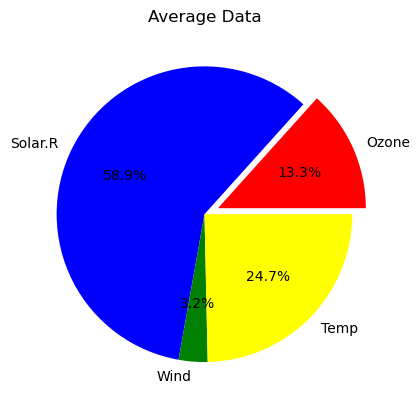

In [77]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',)
plt.title('Average Data')
plt.show()

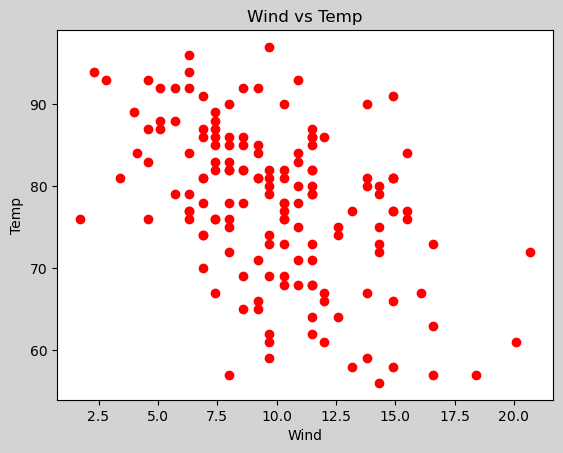

In [81]:
plt.figure(facecolor='lightgray')
plt.scatter(df['Wind'],df['Temp'], c='red')

plt.title('Wind vs Temp')
plt.xlabel('Wind')
plt.ylabel('Temp')

plt.show()

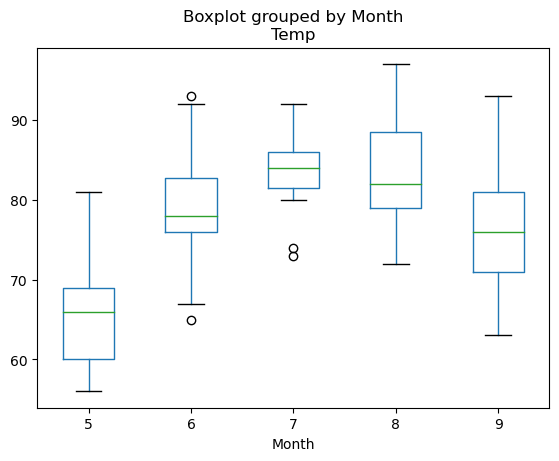

In [82]:
df.boxplot(by='Month', column=['Temp'], grid=False)
plt.show()

<Axes: >

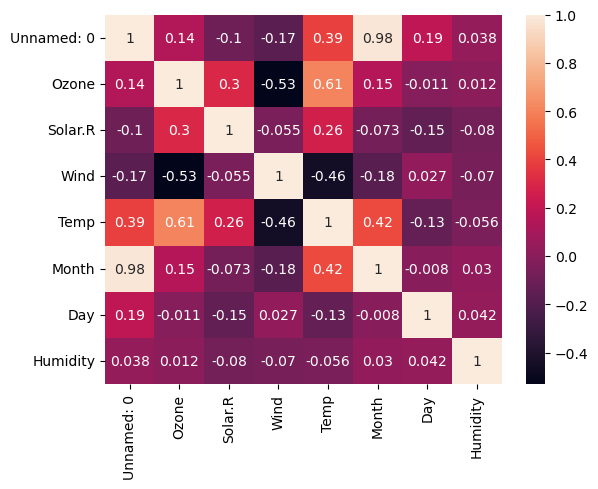

In [83]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Humidity', ylabel='count'>

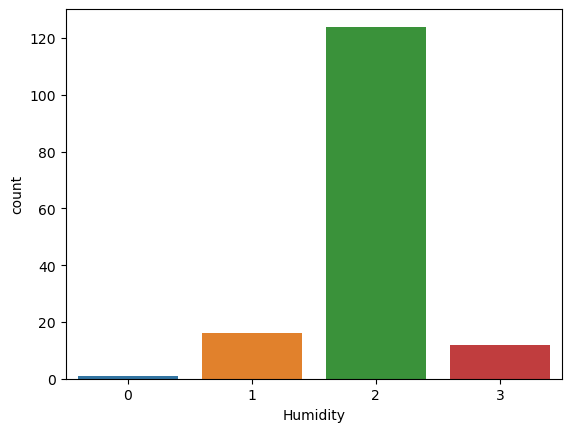

In [85]:
sns.countplot(data=df,x='Humidity')

<Axes: xlabel='Ozone', ylabel='Count'>

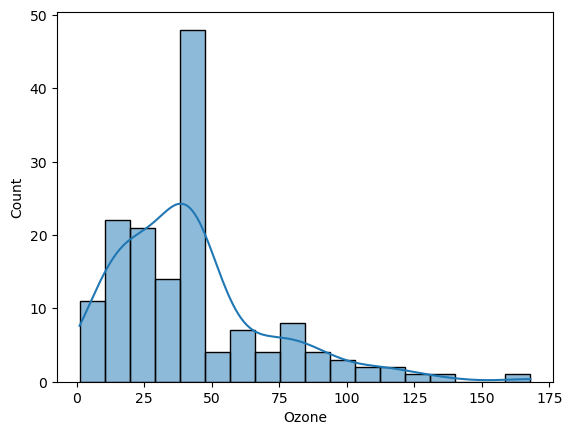

In [89]:
sns.histplot(data=df,x='Ozone',kde=True)